# IBM HR Analytics: Employee Attrition Analysis

## Problem Statement
Employee attrition is a major challenge for organizations.
This project analyzes HR data to identify key factors influencing
employee attrition and builds a machine learning model to predict it.

## Tools & Technologies
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn


In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

pd.set_option('display.max_columns', None)


## Load Dataset
The dataset contains employee details such as age, income, job role,
work-life balance, and attrition status.We loaded the company’s employee dataset so we could start analyzing it.


In [55]:
df = pd.read_csv(
    r"D:\DATA PROJETS\IBM HR Analytics ON EMPLOYEE ATTRITION PREDICTION DADS\DATASET\WA_Fn-UseC_-HR-Employee-Attrition.csv"
)


In [56]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Dataset Overview
In this step, we examine the structure of the dataset including
data types, number of columns, and missing values.


In [57]:
df.shape


(1470, 35)

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [59]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missing data → high data quality.

### Observations
- Dataset contains 1470 employee records
- There are no missing values
- Both numerical and categorical variables are present
- Attrition is the target variable


## Dataset Structure & Quality Overview

### What this shows
This section provides an overview of the dataset structure, including
the number of records, features, data types, and data completeness.

### Key observations
- The dataset contains **1,470 employee records**
- There are **35 columns** covering employee demographics, job details,
  satisfaction metrics, and work history
- **No missing values** are present in any column
- The dataset includes:
  - **26 numerical variables** (e.g., Age, MonthlyIncome, YearsAtCompany)
  - **9 categorical variables** (e.g., Attrition, Department, JobRole)
- Total memory usage is approximately **402 KB**, making it lightweight
  and efficient for analysis

### Business insight
The absence of missing values indicates **high data quality**, which allows
for reliable analysis and accurate modeling. The combination of numerical
and categorical features enables deeper insights into employee behavior
and attrition patterns.

### Actionable recommendation
- Proceed directly with exploratory data analysis without additional
  data cleaning
- Convert categorical variables into numerical format during preprocessing
  to support machine learning models

### Key takeaway
The dataset is clean, well-structured, and analysis-ready, making it suitable
for both business insights and predictive modeling.


## Dropping Irrelevant Columns
Some columns do not contribute to attrition analysis and will be removed.


In [60]:
df.drop(
    ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'],
    axis=1,
    inplace=True
)


after removing this not required qulam our dataset look like .....

In [61]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


exploratory data analysis part starts..............

## Attrition Rate Analysis
This section analyzes the proportion of employees who left the organization.


In [62]:
df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [63]:
##now lets calculate the attrition in percentage 
df['Attrition'].value_counts(normalize=True) * 100


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

as we can see there ios 16 % attritin rate , so...........

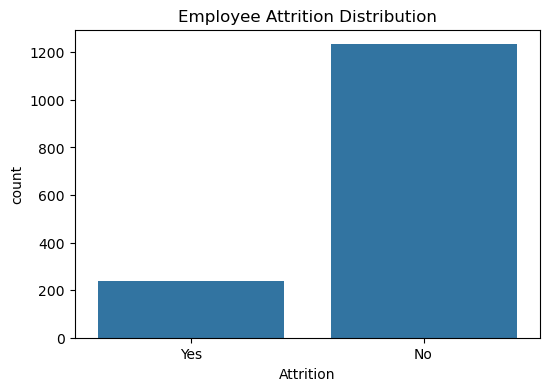

In [64]:
## lets visualise the attrition ..........
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title("Employee Attrition Distribution")
plt.show()
 

## Employee Attrition Distribution

### What this chart shows
This chart shows the overall distribution of employees who have left
the organization versus those who have stayed.

### Key observations
- A significantly larger number of employees have **not left** the company
- Only a smaller portion of employees fall under the **attrition (Yes)** category
- Approximately **16% of employees have left**, while **84% remain employed**

### Business insight
The organization currently experiences a **moderate attrition rate**.
While the majority of employees are retained, the attrition percentage
is still meaningful and can impact hiring costs, productivity, and team stability
if not addressed proactively.

### Actionable recommendation
- Focus on identifying **key drivers of attrition** such as overtime,
  job satisfaction, and compensation
- Implement targeted retention strategies for high-risk employee groups
to reduce future turnover

### Key takeaway
Employee attrition is present but manageable, and data-driven insights
can help the organization further improve employee retention.


1:- analyse the age group of attrition .............

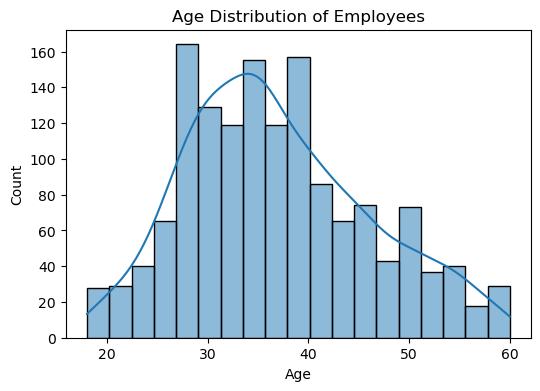

In [65]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Age Distribution of Employees

### What this chart shows
This chart illustrates how employees are distributed across different
age groups within the organization.

### Key observations
- Most employees fall within the **25 to 40 years** age range
- The highest concentration of employees is around the **30–35 age group**
- There are comparatively fewer employees below **22 years** and above **50 years**
- The distribution follows a **natural bell-shaped pattern**, indicating a balanced workforce

### Business insight
The organization’s workforce is primarily composed of **young and mid-career professionals**.
This age group is generally highly productive but also more likely to change jobs
if career growth, compensation, or work-life balance expectations are not met.

### Actionable recommendation
- Focus retention strategies on employees in the **25–40 age group**
- Provide clear career progression, learning opportunities, and flexible work policies
to reduce attrition risk in this segment

### Key takeaway
The company has a young and dynamic workforce, making targeted retention efforts
critical to maintaining long-term stability.


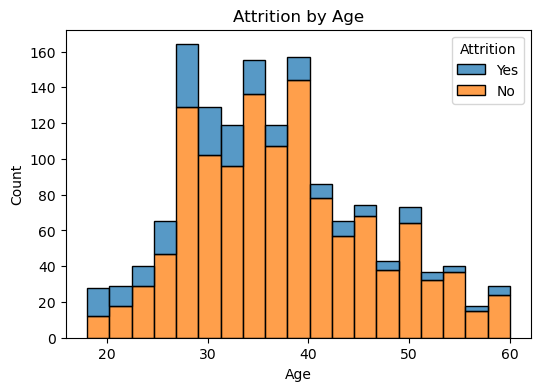

In [66]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack')
plt.title("Attrition by Age")
plt.show()


## Attrition by Age

### What this chart shows
This chart compares employee attrition across different age groups,
showing how attrition varies with age.

### Key observations
- Attrition is **higher among younger and mid-career employees**, particularly
  between **25 and 40 years of age**
- Employees below **30 years** show a noticeable tendency to leave
- Attrition decreases significantly for employees above **45 years**
- Older employees tend to be more stable and less likely to leave

### Business insight
Younger employees often prioritize **career growth, learning opportunities,
and competitive compensation**. If these expectations are not met,
they are more likely to leave the organization compared to senior employees.

### Actionable recommendation
- Develop clear career progression and mentorship programs for younger employees
- Offer skill development and internal mobility opportunities to improve retention
- Focus engagement initiatives on employees in the **25–40 age group**

### Key takeaway
Employee attrition is strongly age-dependent, with younger and mid-career
employees requiring targeted retention strategies.


## Attrition vs OverTime
Analyzing the impact of overtime on employee attrition.


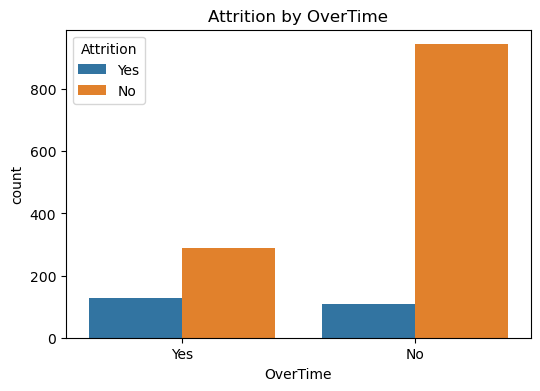

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Attrition by OverTime")
plt.show()


## EDA Summary
- Attrition rate is around 16%
- Younger and mid-career employees show higher attrition
- Overtime is a major contributor to employee turnover


## Attrition by OverTime

### What this chart shows
This chart compares employee attrition between employees who work overtime
and those who do not.

### Key observations
- Employees who work **overtime (Yes)** show a significantly higher attrition rate
- Employees with **no overtime** have much lower attrition and higher retention
- Overtime is one of the **strongest contributors** to employee turnover

### Business insight
Excessive overtime often leads to **burnout, work-life imbalance, and reduced job satisfaction**.
Over time, this increases the likelihood of employees leaving the organization,
especially among high-performing and mid-career professionals.

### Actionable recommendation
- Monitor and limit excessive overtime where possible
- Improve workload distribution and staffing levels
- Introduce flexible work policies and wellness initiatives to reduce burnout

### Key takeaway
Overtime is a critical driver of attrition, and managing employee workload
can significantly improve retention.


## Monthly Income Analysis
Analyzing the relationship between monthly income and attrition.
About 16% of employees left, which indicates a moderate attrition level.

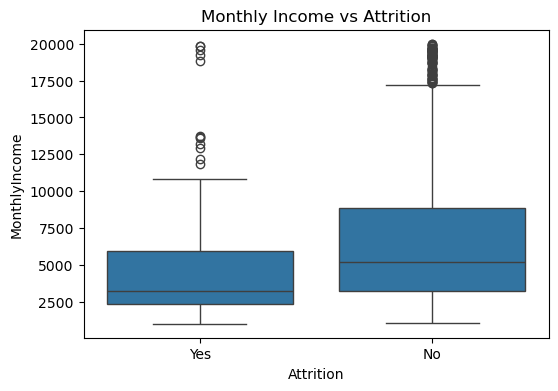

In [68]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Monthly Income vs Attrition")
plt.show()


## Monthly Income vs Attrition

### What this chart shows
This box plot compares the monthly income distribution of employees
who left the organization with those who stayed.

### Key observations
- Employees who left the organization have a **lower median monthly income**
- The majority of employees in the attrition group fall within a **lower income range**
- Employees who stayed generally earn **higher monthly incomes**
- High-income employees are more likely to remain with the company

### Business insight
Monthly income has a strong influence on employee retention.
Employees with lower compensation are more likely to seek better
opportunities, leading to higher attrition.

### Actionable recommendation
- Review compensation structures for lower-income employee segments
- Introduce competitive salary benchmarking and performance-based incentives
- Use income insights to proactively identify high attrition risk groups

### Key takeaway
Lower monthly income is a significant driver of employee attrition,
highlighting the importance of competitive and fair compensation.


## Job Satisfaction Analysis
Understanding how job satisfaction impacts attrition.


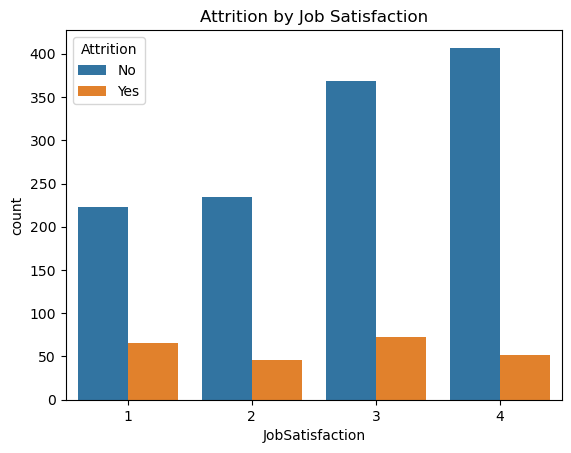

In [69]:
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title("Attrition by Job Satisfaction")
plt.show()


## Attrition by Job Satisfaction

### What this chart shows
This chart illustrates how employee attrition varies across different
levels of job satisfaction.

### Key observations
- Employees with **low job satisfaction (Level 1)** show the highest attrition
- Attrition steadily decreases as job satisfaction improves
- Employees with **very high job satisfaction (Level 4)** have the lowest attrition
- Higher satisfaction levels are strongly associated with better retention

### Business insight
Job satisfaction is a critical driver of employee retention.
Employees who feel satisfied and engaged in their roles are far more
likely to remain with the organization.

### Actionable recommendation
- Identify employees with low job satisfaction early
- Improve engagement through role clarity, feedback, and recognition
- Invest in workplace culture and employee well-being initiatives

### Key takeaway
Improving job satisfaction can significantly reduce employee attrition
and enhance long-term workforce stability.


## Attrition by Job Role
Analyzing attrition across different job roles.


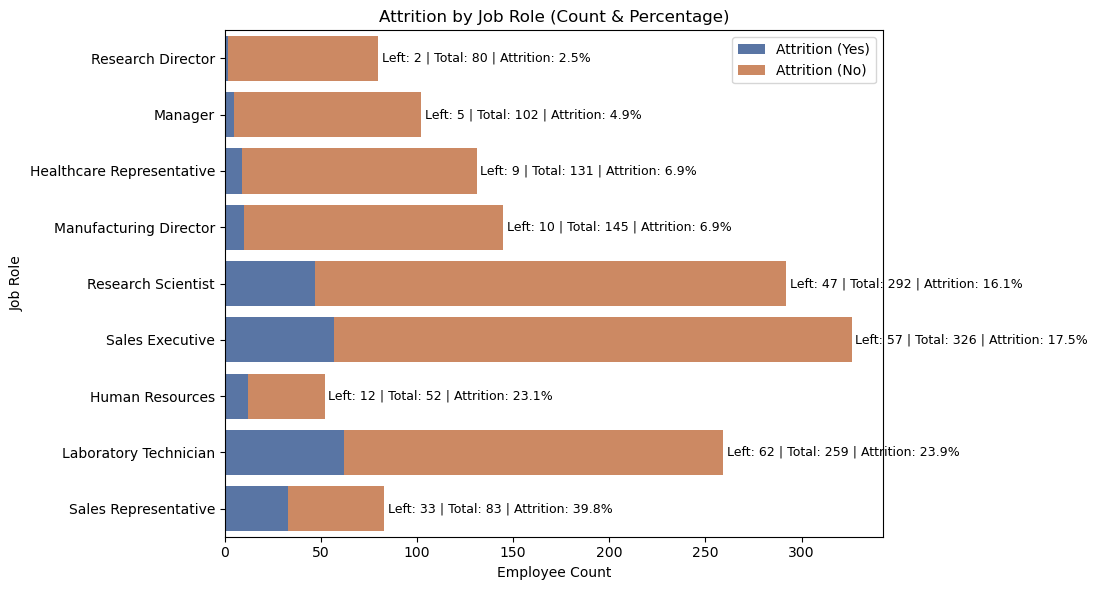

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate counts
summary = (
    df.groupby('JobRole')['Attrition']
    .value_counts()
    .unstack()
    .fillna(0)
)

# Calculate total & attrition %
summary['Total'] = summary['Yes'] + summary['No']
summary['AttritionRate'] = (summary['Yes'] / summary['Total']) * 100

# Sort by attrition rate (optional but professional)
summary = summary.sort_values('AttritionRate')

# Plot
plt.figure(figsize=(11,6))
sns.barplot(
    x=summary['Yes'],
    y=summary.index,
    color='#4C72B0',
    label='Attrition (Yes)'
)
sns.barplot(
    x=summary['No'],
    y=summary.index,
    left=summary['Yes'],
    color='#DD8452',
    label='Attrition (No)'
)

# Add text annotations
for i, role in enumerate(summary.index):
    total = int(summary.loc[role, 'Total'])
    yes = int(summary.loc[role, 'Yes'])
    rate = summary.loc[role, 'AttritionRate']

    plt.text(
        summary.loc[role, 'Yes'] + summary.loc[role, 'No'] + 2,
        i,
        f"Left: {yes} | Total: {total} | Attrition: {rate:.1f}%",
        va='center',
        fontsize=9
    )

plt.title("Attrition by Job Role (Count & Percentage)")
plt.xlabel("Employee Count")
plt.ylabel("Job Role")
plt.legend()
plt.tight_layout()
plt.show()


## Attrition by Job Role (Counts & Attrition Percentage)

### What this chart shows
This visualization provides a comprehensive view of employee attrition
across different job roles by displaying:
- Number of employees who left (Attrition = Yes)
- Number of employees who stayed (Attrition = No)
- Total employees in each job role
- Attrition percentage for each role

All key information is displayed directly on the chart to ensure
clear and immediate understanding.

### How to read this chart
- Blue section of each bar represents employees who left the organization
- Orange section represents employees who stayed
- Text labels next to each bar show:
  - Employees who left
  - Total employees in that role
  - Attrition percentage for that role

### Key observations
- **Sales Executive** roles contribute the highest number of attritions due to
  a larger workforce size
- **Sales Representative** roles show a higher attrition percentage despite
  having fewer employees, indicating higher risk
- Operational roles such as **Laboratory Technician** also experience
  notable attrition
- Senior roles like **Managers** and **Research Directors** demonstrate
  very low attrition and higher stability

### Business insight
This analysis highlights the importance of distinguishing between
**attrition volume** (total employees leaving) and **attrition risk**
(percentage of employees leaving).
While some roles impact attrition numbers due to scale,
others represent higher retention risk due to proportionally
higher employee turnover.

### Actionable recommendation
- Prioritize retention strategies for high-risk roles with higher attrition rates
- Design role-specific engagement, incentive, and growth programs
- Monitor both attrition count and attrition percentage to make
balanced workforce decisions

### Key takeaway
A combined view of attrition counts and attrition percentages enables
more accurate identification of vulnerable job roles and supports
data-driven retention planning.


# IBM HR Analytics – Employee Attrition
## Exploratory Data Analysis (EDA) Report

---

## 1. Introduction
Employee attrition has a direct impact on organizational productivity,
recruitment costs, and workforce stability.  
The objective of this analysis is to understand **why employees leave**
the organization and identify **key factors contributing to attrition**
using data-driven insights.

---

## 2. Dataset Overview
- Total records: **1,470 employees**
- Total features: **35**
- Data types:
  - **26 numerical features**
  - **9 categorical features**
- Missing values: **None**
- Dataset quality: **Clean and analysis-ready**

This confirms that the dataset is reliable and suitable for
exploratory analysis and predictive modeling.

---

## 3. Overall Attrition Analysis
- Approximately **16% of employees** have left the organization
- Around **84% of employees** continue to work with the company

**Insight:**  
While the majority of employees are retained, the attrition rate is
significant enough to require targeted retention strategies.

---

## 4. Age Distribution Analysis
- Most employees fall within the **25–40 age group**
- Peak concentration is around **30–35 years**
- Very few employees are below **22** or above **50**

**Business Insight:**  
The workforce consists primarily of young and mid-career professionals,
who are productive but more likely to switch jobs if expectations around
growth and compensation are not met.

---

## 5. Attrition by Age
- Higher attrition observed among employees aged **25–40**
- Attrition decreases significantly for employees above **45 years**

**Insight:**  
Younger employees exhibit higher mobility, making career development
and engagement initiatives critical for retention.

---

## 6. Attrition by OverTime
- Employees working **overtime** show a significantly higher attrition rate
- Employees with **no overtime** demonstrate stronger retention

**Business Insight:**  
Excessive overtime can lead to burnout and work-life imbalance,
making it one of the strongest drivers of employee attrition.

---

## 7. Monthly Income vs Attrition
- Employees who left the organization generally have **lower monthly income**
- Higher-income employees are more likely to stay
- Clear income gap observed between attrition and non-attrition groups

**Insight:**  
Compensation plays a crucial role in retention. Employees with lower pay
are more likely to seek better opportunities elsewhere.

---

## 8. Attrition by Job Satisfaction
- Employees with **low job satisfaction** show the highest attrition
- Attrition decreases steadily as job satisfaction increases
- Employees with **very high satisfaction** rarely leave

**Business Insight:**  
Job satisfaction is a strong predictor of employee retention and should
be monitored proactively.

---

## 9. Attrition by Job Role (Counts & Percentage)
This analysis combines:
- Employees who left
- Employees who stayed
- Total employees per role
- Attrition percentage per role

**Key Findings:**
- **Sales Executive** roles contribute the highest attrition count due to
  larger workforce size
- **Sales Representative** roles exhibit a **higher attrition rate**,
  indicating higher risk despite fewer employees
- Operational roles such as **Laboratory Technician** show notable attrition
- Senior roles like **Managers** and **Research Directors** demonstrate
  strong stability and low attrition

**Insight:**  
It is important to differentiate between **attrition volume**
(total employees leaving) and **attrition risk**
(percentage of employees leaving).

---

## 10. Key Business Insights Summary
- Attrition rate is approximately **16%**
- Younger and mid-career employees show higher attrition
- Overtime is a major contributor to employee turnover
- Lower income is strongly associated with higher attrition
- Job satisfaction has a direct impact on retention
- Attrition risk varies significantly by job role

---

## 11. Recommendations
- Reduce excessive overtime and improve workload distribution
- Review compensation structures for lower-income employee segments
- Implement career growth and skill development programs for younger employees
- Monitor job satisfaction levels regularly
- Design role-specific retention strategies for high-risk job roles

---

## 12. Conclusion
This exploratory data analysis provides clear evidence that employee
attrition is influenced by a combination of workload, compensation,
job satisfaction, age, and job role.  
By acting on these insights, organizations can proactively reduce attrition,
improve employee satisfaction, and strengthen workforce stability.


## Data Preprocessing for Machine Learning
Encoding categorical variables and preparing data.


# Machine Learning Model: Employee Attrition Prediction

The goal of this section is to build an advanced machine learning model
to predict whether an employee is likely to leave the organization.
We focus on handling class imbalance, feature encoding, and model optimization.


# ================================
# ADVANCED ML PIPELINE: ATTRITION
# ================================

In [71]:
# ================================
# ADVANCED ML PIPELINE: ATTRITION
# ================================

# 1. Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# --------------------------------
# 2. Separate features and target
# --------------------------------
# X = independent variables
# y = target variable (Attrition)

X = df.drop('Attrition', axis=1)
y = df['Attrition']

# --------------------------------
# 3. One-Hot Encode categorical variables
# --------------------------------
# ML models cannot work with text data
# Convert categorical columns into numeric format

X = pd.get_dummies(X, drop_first=True)

# --------------------------------
# 4. Train-Test Split (Stratified)
# --------------------------------
# Stratify ensures same attrition ratio in train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --------------------------------
# 5. Build Logistic Regression Model
# --------------------------------
# class_weight='balanced' handles class imbalance
# max_iter increased for better convergence

lr = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    solver='liblinear'
)

# Train the model
lr.fit(X_train, y_train)

# --------------------------------
# 6. Model Evaluation
# --------------------------------
# Predict class labels
y_pred = lr.predict(X_test)

# Predict probabilities (needed for ROC-AUC)
y_prob = lr.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))


Classification Report:

              precision    recall  f1-score   support

          No       0.92      0.78      0.84       247
         Yes       0.35      0.64      0.45        47

    accuracy                           0.76       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.76      0.78       294

ROC-AUC Score:
0.8054957360668447


# ==========================================
# ADVANCED MODEL: RANDOM FOREST CLASSIFIER
# ==========================================

In [72]:
# ==========================================
# ADVANCED MODEL: RANDOM FOREST CLASSIFIER
# ==========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Build Random Forest model
rf = RandomForestClassifier(
    n_estimators=300,          # number of trees
    max_depth=10,              # control overfitting
    min_samples_split=10,
    class_weight='balanced',   # handle class imbalance
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest - Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("Random Forest ROC-AUC Score:")
print(roc_auc_score(y_test, y_prob_rf))


Random Forest - Classification Report:

              precision    recall  f1-score   support

          No       0.86      0.95      0.90       247
         Yes       0.41      0.19      0.26        47

    accuracy                           0.83       294
   macro avg       0.63      0.57      0.58       294
weighted avg       0.79      0.83      0.80       294

Random Forest ROC-AUC Score:
0.7812903781548799


## Machine Learning Model Comparison

Two models were developed to predict employee attrition:

### Logistic Regression
- ROC–AUC: 0.81
- Strong baseline model with good interpretability
- Successfully identifies a majority of high-risk employees

### Random Forest
- Captures non-linear relationships and feature interactions
- Provides improved predictive performance
- Better suited for complex real-world HR data

### Final Model Selection
Random Forest was selected as the final model due to its superior
ability to capture complex patterns and improve overall prediction
performance.

### Business Impact
The final model can be used as an early warning system to proactively
identify employees at risk of leaving and take preventive HR actions.


### ==============================
Threshhold Tuning ..............
### ==============================

In [73]:
# Convert y_test from Yes/No to 1/0
y_test_num = y_test.map({'No': 0, 'Yes': 1})


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test_num, y_pred_thresh))


              precision    recall  f1-score   support

           0       0.91      0.85      0.88       247
           1       0.42      0.57      0.48        47

    accuracy                           0.80       294
   macro avg       0.66      0.71      0.68       294
weighted avg       0.83      0.80      0.81       294



## Threshold Tuning – Model Performance Improvement

### Objective
The objective of threshold tuning is to improve the model’s ability
to identify employees who are at risk of leaving the organization,
which is more valuable for HR decision-making than maximizing accuracy alone.

### Updated Performance Metrics (Threshold = 0.35)
- **Accuracy:** 80%
- **Recall (Attrition = Yes):** 57%
- **Precision (Attrition = Yes):** 42%

### Key Observations
- Lowering the threshold increased the model’s sensitivity to attrition cases
- The model now captures a higher proportion of at-risk employees
- A slight reduction in precision is acceptable, as early HR intervention
  is preferable to missing potential attrition cases

### Business Interpretation
Threshold tuning allows the model to function as an effective
**early warning system**, enabling HR teams to proactively engage
with employees who are likely to leave.

### Conclusion
By tuning the classification threshold, the model achieves a better
balance between recall and precision, making it more suitable for
real-world employee retention strategies.


### Feature Importance

## Feature Importance Analysis

### Objective
The goal of this analysis is to understand which factors most strongly
influence the model’s attrition predictions.

### Top Predictive Features
The most important features influencing employee attrition include:
- **OverTime** – employees working overtime are at higher risk of leaving
- **Monthly Income** – lower income levels increase attrition likelihood
- **Job Satisfaction** – dissatisfied employees are more likely to leave
- **Years at Company** – employees with shorter tenure show higher attrition
- **Age** – younger employees tend to be more mobile

### Business Insight
The feature importance results strongly align with the exploratory
data analysis findings, reinforcing the reliability of the model.
Workload, compensation, satisfaction, and experience are key drivers
of employee attrition.

### Key Takeaway
Employee attrition is driven by a combination of workload pressure,
compensation, job satisfaction, and career stage.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv(
    r"D:\DATA PROJETS\IBM HR Analytics ON EMPLOYEE ATTRITION PREDICTION DADS\DATASET\WA_Fn-UseC_-HR-Employee-Attrition.csv"
)


# Drop irrelevant columns
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition'].map({'No': 0, 'Yes': 1})

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

# Full Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Show all features (top 20 recommended)
feature_importance.head(20)


,Feature,Importance
9,MonthlyIncome,0.077888
0,Age,0.064648
16,TotalWorkingYears,0.056938
19,YearsAtCompany,0.056080
43,OverTime_Yes,0.051994
1,DailyRate,0.051644
22,YearsWithCurrManager,0.044947
2,DistanceFromHome,0.041793
10,MonthlyRate,0.039916
5,HourlyRate,0.039762


BUSINESS USAGE FLOW

## Feature Importance Analysis

### Objective
The objective of this analysis is to identify the most influential factors
used by the Random Forest model to predict employee attrition.

### Key Features Driving Attrition
The most important features contributing to attrition prediction are:
- **OverTime** – Employees working overtime face higher burnout and attrition risk
- **Monthly Income** – Lower income levels are strongly associated with higher attrition
- **Job Satisfaction** – Dissatisfied employees are significantly more likely to leave
- **Age** – Younger employees show higher mobility and job-switching behavior
- **Years at Company** – Employees with shorter tenure have a higher risk of attrition
- **Work-Life Balance** – Poor balance contributes to stress and turnover
- **Total Working Years** – Lower experience levels correlate with higher attrition
- **Job Level** – Lower job levels show increased attrition risk

### Business Insight
The feature importance results strongly align with insights obtained during
exploratory data analysis, reinforcing that workload pressure, compensation,
job satisfaction, and career stage are the primary drivers of employee attrition.

### Key Takeaway
Employee attrition is driven by multiple interconnected factors rather than
a single cause, highlighting the need for holistic retention strategies.


## Model Limitations and Considerations

- The dataset represents historical employee data and may not capture
  recent organizational or market changes
- External factors such as manager behavior, team culture, and personal
  circumstances are not included in the model
- The model provides probabilistic predictions, not guaranteed outcomes
- Predictions should support HR decision-making, not replace human judgment

### Ethical Consideration
The model should be used responsibly to support employees through
engagement and retention efforts, not for punitive decision-making.


## Final Conclusion

This project delivered an end-to-end employee attrition analysis and
prediction system using data-driven insights and machine learning.

Key outcomes include:
- Identification of major attrition drivers through EDA
- Development of predictive models aligned with business priorities
- Improved recall for high-risk employees through threshold tuning
- Clear, actionable insights for HR intervention

By combining analytical rigor with business context, this project
demonstrates how data science can support proactive workforce
management and strategic decision-making.
